In [1]:
from pathlib import Path
import pandas as pd
import plotly.express as px


Classe 10: 99 images
Classe 11: 100 images
Classe 12: 100 images
Classe 13: 100 images
Classe 14: 100 images
Classe 15: 100 images
Classe 16: 17 images
Classe 20: 99 images
Classe 21: 100 images
Classe 22: 100 images
Classe 23: 100 images
Classe 24: 100 images
Classe 25: 100 images
Classe 26: 73 images
Classe 30: 99 images
Classe 31: 100 images
Classe 32: 100 images
Classe 33: 100 images
Classe 34: 100 images
Classe 35: 98 images
Classe 36: 22 images


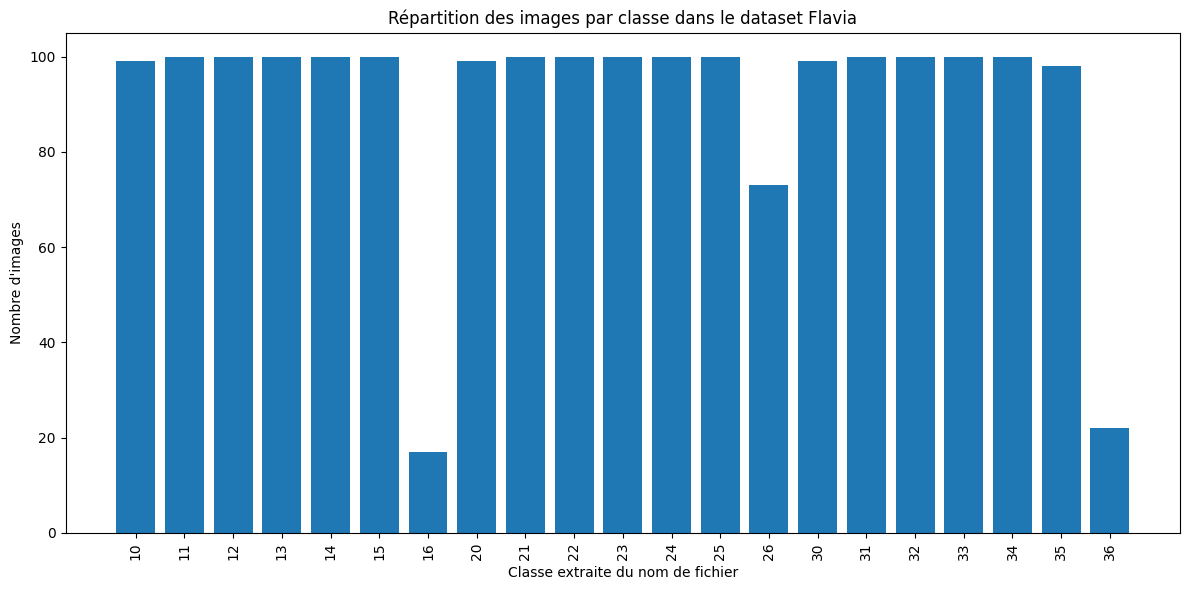

In [3]:
import os
import matplotlib.pyplot as plt
from collections import Counter

dataset_path = '/workspaces/datasciencetest_reco_plante/dataset/flavia/data/Leaves'

# Lister les fichiers images
images = [f for f in os.listdir(dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Extraire la classe depuis le nom de fichier (ex: 1001.jpg => classe '10' ou '100')
# Ici on prend les 2 premiers chiffres pour exemple, adapte si besoin
def extract_class(filename):
    # On prend les premiers chiffres avant le reste (jusqu'à 2 chiffres par exemple)
    return filename[:2]

# Construire la liste des classes extraites
classes = [extract_class(img) for img in images]

# Compter le nombre d'images par classe
counter = Counter(classes)

# Trier par classe
classes_sorted = sorted(counter.keys())
counts_sorted = [counter[cls] for cls in classes_sorted]

# Affichage console
for cls, count in zip(classes_sorted, counts_sorted):
    print(f"Classe {cls}: {count} images")

# Graphique
plt.figure(figsize=(12,6))
plt.bar(classes_sorted, counts_sorted)
plt.xlabel('Classe extraite du nom de fichier')
plt.ylabel('Nombre d\'images')
plt.title('Répartition des images par classe dans le dataset Flavia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


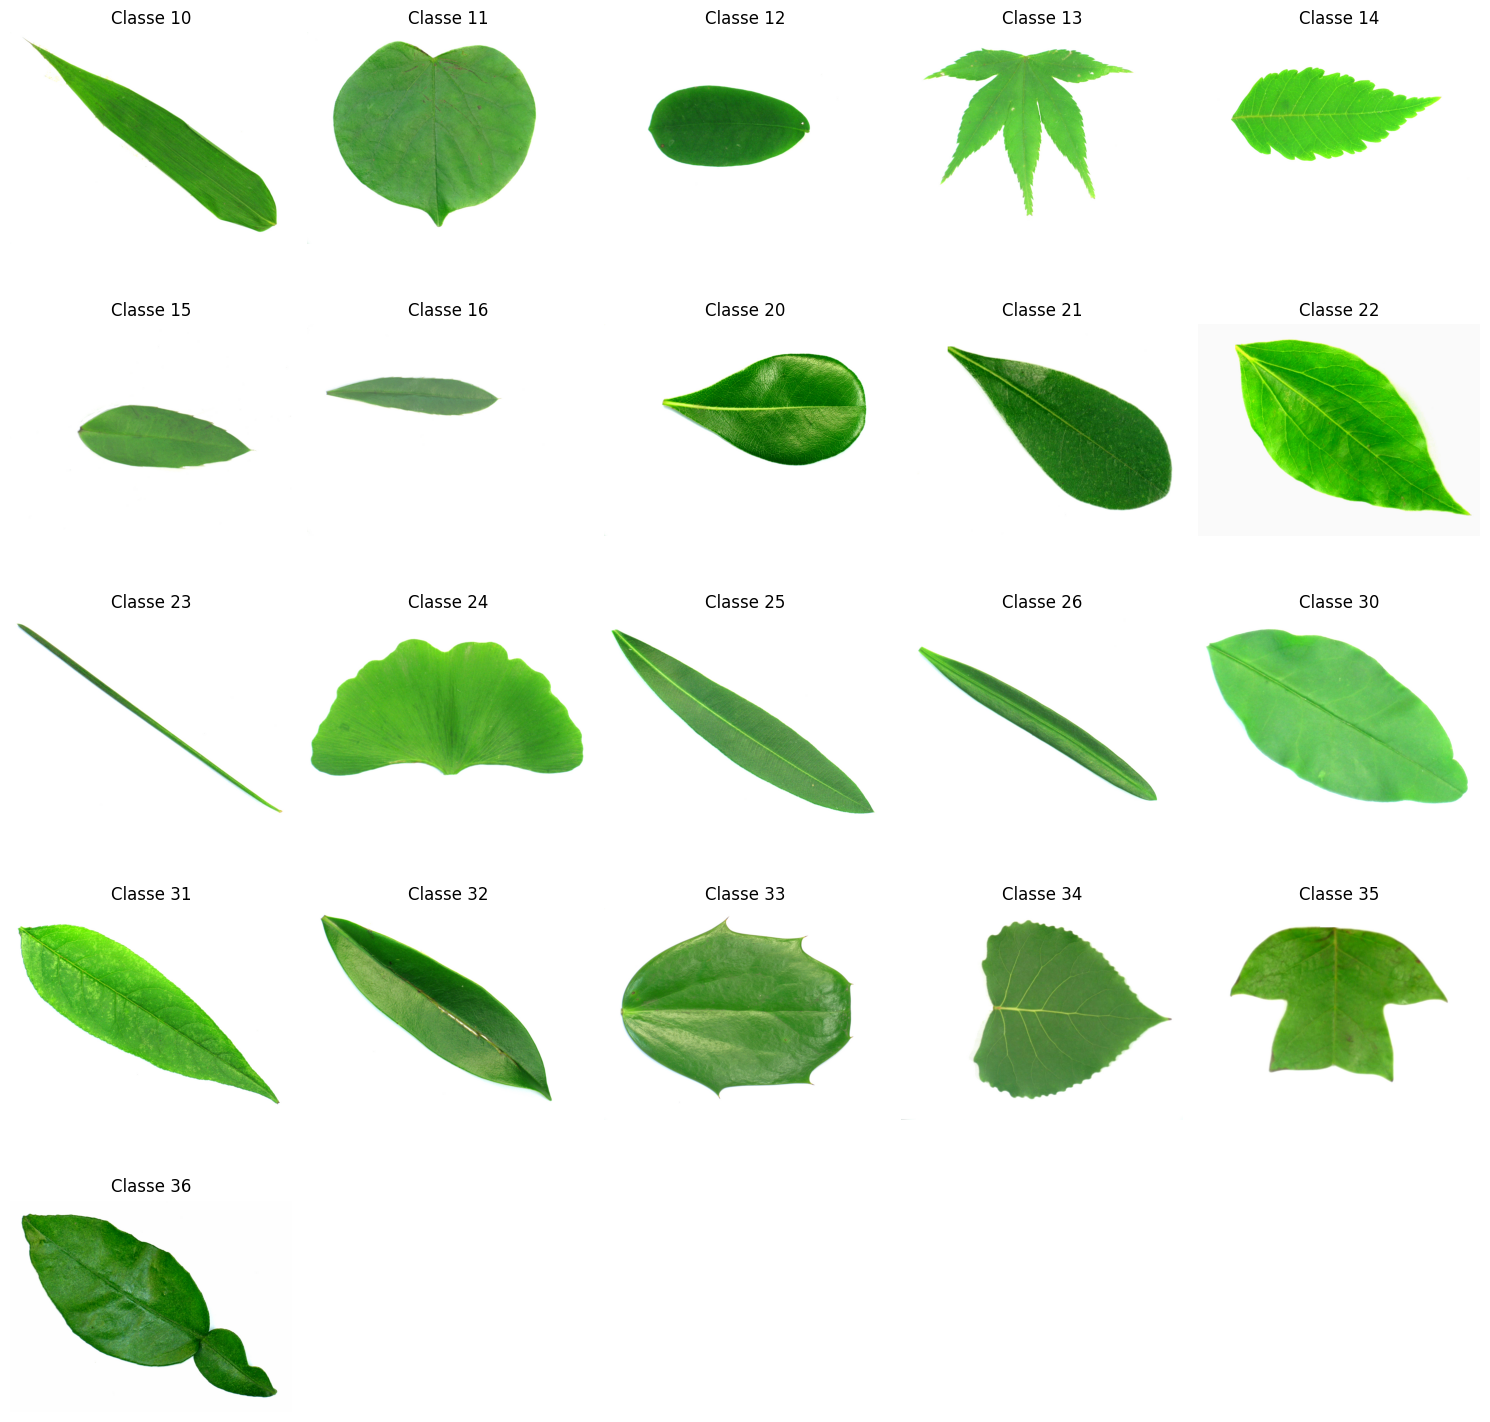

In [4]:
import os
import matplotlib.pyplot as plt
from collections import defaultdict
from PIL import Image

dataset_path = '/workspaces/datasciencetest_reco_plante/dataset/flavia/data/Leaves'

# Lister les fichiers images
images = [f for f in os.listdir(dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Fonction pour extraire la classe (ex: 2 premiers chiffres)
def extract_class(filename):
    return filename[:2]  # adapte si besoin

# Dictionnaire classe -> image représentative
class_to_image = defaultdict(list)

for img in images:
    cls = extract_class(img)
    if cls not in class_to_image:
        class_to_image[cls] = img  # on garde la 1ère image rencontrée par classe

# Affichage
num_classes = len(class_to_image)
cols = 5
rows = (num_classes + cols - 1) // cols

plt.figure(figsize=(15, 3*rows))

for i, (cls, img_name) in enumerate(sorted(class_to_image.items())):
    img_path = os.path.join(dataset_path, img_name)
    img = Image.open(img_path)
    
    plt.subplot(rows, cols, i+1)
    plt.imshow(img)
    plt.title(f'Classe {cls}')
    plt.axis('off')

plt.tight_layout()
plt.show()


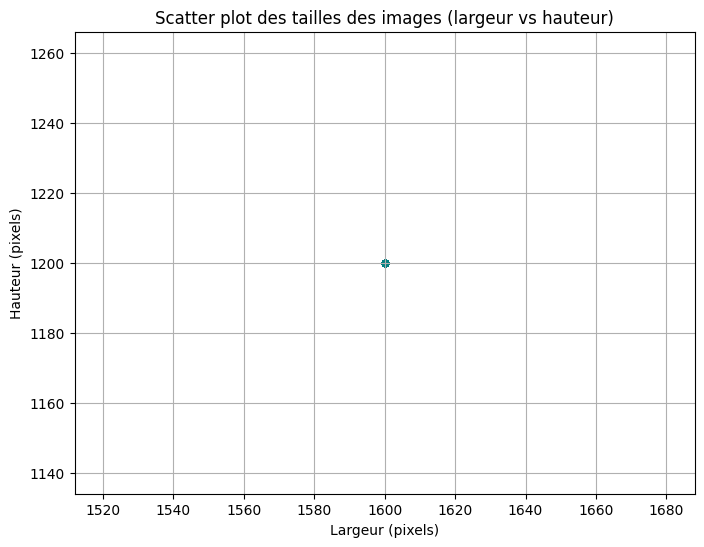

In [6]:
import os
import matplotlib.pyplot as plt
from PIL import Image

dataset_path = '/workspaces/datasciencetest_reco_plante/dataset/flavia/data/Leaves'

images = [f for f in os.listdir(dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

widths = []
heights = []

for img_name in images:
    img_path = os.path.join(dataset_path, img_name)
    with Image.open(img_path) as img:
        w, h = img.size
        widths.append(w)
        heights.append(h)

plt.figure(figsize=(8,6))
plt.scatter(widths, heights, alpha=0.5, s=20, color='teal')
plt.xlabel('Largeur (pixels)')
plt.ylabel('Hauteur (pixels)')
plt.title('Scatter plot des tailles des images (largeur vs hauteur)')
plt.grid(True)
plt.show()



Extension .jpg: 1907 fichiers


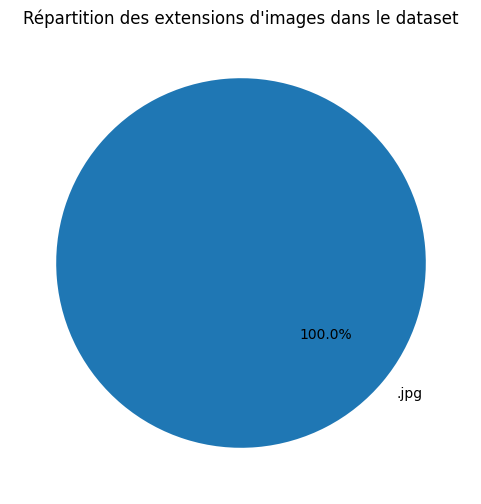

In [7]:
import os
import matplotlib.pyplot as plt
from collections import Counter

dataset_path = '/workspaces/datasciencetest_reco_plante/dataset/flavia/data/Leaves'

# Lister tous les fichiers
files = os.listdir(dataset_path)

# Extraire les extensions (en minuscule)
extensions = [os.path.splitext(f)[1].lower() for f in files if os.path.isfile(os.path.join(dataset_path, f))]

# Compter les occurrences
counter = Counter(extensions)

# Afficher les résultats
for ext, count in counter.items():
    print(f"Extension {ext}: {count} fichiers")

# Graphique camembert
plt.figure(figsize=(6,6))
plt.pie(counter.values(), labels=counter.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Répartition des extensions d\'images dans le dataset')
plt.show()





In [8]:
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
from skimage.feature import hog

def extract_features(image_path):
    img = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128))

    # Moments de Hu
    moments = cv2.moments(img)
    hu_moments = cv2.HuMoments(moments).flatten()
    hu_moments = -np.sign(hu_moments) * np.log10(np.abs(hu_moments) + 1e-10)

    # Transformée de Fourier (magnitude moyenne)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-10)
    fourier_mean = magnitude_spectrum.mean()

    # HOG
    hog_features = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), feature_vector=True)
    hog_reduced = hog_features[:20]

    return np.concatenate([hu_moments, [fourier_mean], hog_reduced])

def extract_class(filename):
    # Exemple : les 2 premiers chiffres comme classe
    return filename[:2]

def build_feature_dataset_flavia(dataset_path):
    root = Path(dataset_path)
    records = []

    images = [f for f in root.iterdir() if f.is_file() and f.suffix.lower() in ['.jpg', '.jpeg', '.png']]

    for image_path in images:
        try:
            features = extract_features(image_path)
            species = extract_class(image_path.name)
            record = {
                'species': species,
                'image_path': str(image_path)
            }
            for i, val in enumerate(features):
                record[f'feat_{i}'] = val
            records.append(record)
        except Exception as e:
            print(f"Erreur avec {image_path}: {e}")

    df = pd.DataFrame(records)
    return df

if __name__ == "__main__":
    dataset_path = "/workspaces/datasciencetest_reco_plante/dataset/flavia/data/Leaves"
    df = build_feature_dataset_flavia(dataset_path)

    print("✅ DataFrame généré :")
    print(df.head())
    print("\nℹ️ Résumé des colonnes :")
    print(df.info())


✅ DataFrame généré :
  species                                         image_path    feat_0  \
0      24  /workspaces/datasciencetest_reco_plante/datase...  3.020234   
1      22  /workspaces/datasciencetest_reco_plante/datase...  3.019801   
2      10  /workspaces/datasciencetest_reco_plante/datase...  3.104628   
3      12  /workspaces/datasciencetest_reco_plante/datase...  3.090953   
4      25  /workspaces/datasciencetest_reco_plante/datase...  3.109052   

     feat_1    feat_2    feat_3  feat_4  feat_5  feat_6      feat_7  ...  \
0  8.635831  9.997847  9.995960   -10.0    10.0    10.0  132.458370  ...   
1  8.481756  9.999076  9.999189    10.0    10.0    10.0  137.339049  ...   
2  8.589339  9.996904  9.998329   -10.0   -10.0   -10.0  131.191161  ...   
3  9.737116  9.999929  9.995384   -10.0   -10.0    10.0  133.387564  ...   
4  8.618662  9.999620  9.999405    10.0    10.0    10.0  132.793325  ...   

    feat_18   feat_19   feat_20   feat_21   feat_22   feat_23   feat_24  \
0 

In [ ]:
# import os
# from PIL import Image

# def clean_image_dataset(dataset_path):
#     bad_images = []
#     for fname in os.listdir(dataset_path):
#         if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
#             path = os.path.join(dataset_path, fname)
#             try:
#                 with Image.open(path) as img:
#                     img.verify()
#             except Exception:
#                 bad_images.append(path)

#     # Supprimer les images corrompues
#     for bad_img in bad_images:
#         os.remove(bad_img)
#         print(f"Supprimé {bad_img}")

#     print(f"Nettoyage terminé. {len(bad_images)} images supprimées.")

# if __name__ == "__main__":
#     dataset_folder = "/workspaces/datasciencetest_reco_plante/dataset/flavia/data/Leaves"
#     clean_image_dataset(dataset_folder)




#     Pipeline clean_image_dataset expliqué
# Parcours tous les fichiers du dossier donné (dataset_path)

# Pour chaque fichier, il vérifie s’il a une extension image valide : .jpg, .jpeg, .png

# Pour chaque image valide, il tente de l’ouvrir avec PIL (Pillow) et de vérifier son intégrité

# img.verify() permet de détecter si l’image est corrompue ou mal formatée, sans charger complètement l’image en mémoire

# S’il y a une erreur (fichier corrompu, non lisible), il ajoute le chemin du fichier dans la liste bad_images

# Après avoir inspecté toutes les images, il supprime les images corrompues listées

# Il supprime physiquement les fichiers corrompus du disque dur avec os.remove

# Affiche un message indiquant combien d’images ont été supprimées

# Résultat final :
# Toutes les images corrompues ou illisibles sont retirées du dataset

# Tu obtiens un dossier nettoyé, prêt à être utilisé pour extraire des features ou entraîner un modèle












# Workflow typique :
# Nettoyer le dataset d’images (avec le pipeline)

# (Optionnel) Normaliser les tailles d’images (redimensionner toutes à la même dimension) si ce n’est pas déjà fait dans l’extraction des features

# DataAugmentation

# Extraire les features sur ce dataset propre, avec ta fonction extract_features() que tu as déjà (Moments de Hu, Fourier, HOG, etc.)

# Construire ton DataFrame de features avec labels (species) et chemins d’images

# Nettoyer ce DataFrame (valeurs manquantes, infinis, etc.)

# Analyser / Visualiser les données

# Passer à la modélisation ML (classification, clustering, etc.)